In [2]:
import sys
sys.path.append("../../")

In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math
from delay.delay import *
import delay.calculator as calc
from delay.strategy import fA_HardInterval, fB_HardInterval, showIntervalFunctions
from delay.simulation import Simulation, FunctionType
from delay.value import calculateValue

In [21]:
def modelFunctions(N, d = 20):    
    def fA(x):
        return N/2 if x <= d else 0

    def fB(x):
        return N/2 if x >= -d else 0
    
    return (fA, fB)

def simulate():
    def nextElem(func):
        term = -N/2 if func == max else N/2
        rc = calculateValue(previousA, previousB)
        value = -rc if func == max else rc
        return func(x[current] + value, term)
    
    current = len(x)-1
    for _ in range(0, duration):
        previousA, previousB = fA(x[current - tauA]), fB(x[current - tauB])
        
        prob = calculateProbability(previousA - previousB)
        r = random.random()
        if r <= prob:
            nextElement = nextElem(min) # +1
        else:
            nextElement = nextElem(max) # -1
                
        x.append(nextElement)
        current += 1

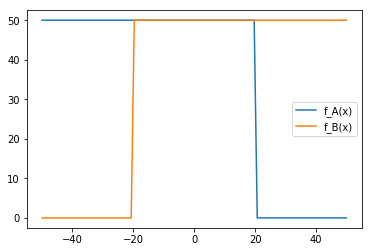

In [22]:
showIntervalFunctions(fA_HardInterval, fB_HardInterval, 100)

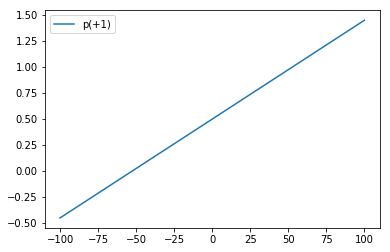

In [23]:
calculateProbability = calc.linear(100)

N = 100
x = np.linspace(-N, N, num=1000)

y = []
for xx in x:
    y.append(calculateProbability(xx))

plt.plot(x, y, label='p(+1)')

plt.legend()
plt.show()

µ =  -0.4380361628692725


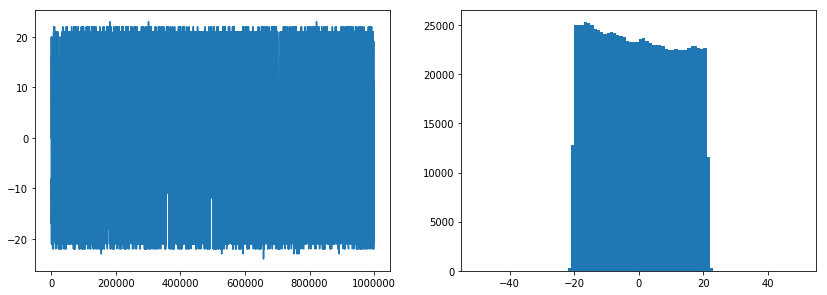

In [29]:
N = 100
tauA = 0
tauB = 0
x = [0] * 20 + [1] 
duration = 10000 * N
conv = N

simulate()
            
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[100*conv:], bins=np.linspace(-N/2, N/2, N+1))
print('µ = ', np.mean(x[100*conv:]))

µ =  -2.8727340127128618


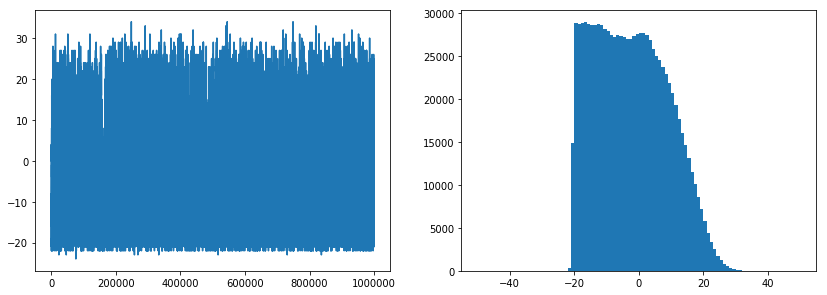

In [30]:
N = 100
tauA = 20
tauB = 0
x = [0] * 20 + [1] 
duration = 10000 * N
conv = N

simulate()
            
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[100*conv:], bins=np.linspace(-N/2, N/2, N+1));
print('µ = ', np.mean(x[100*conv:]))

µ =  3.125106437136182


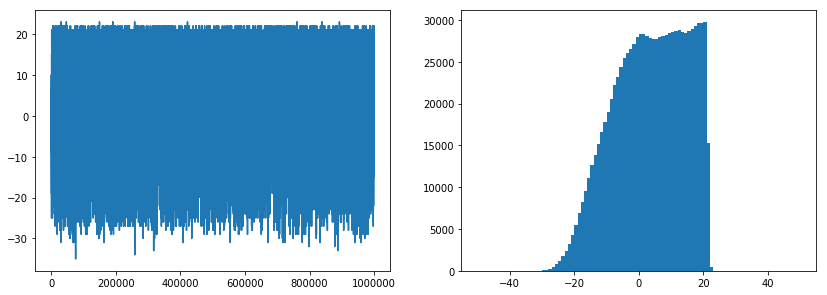

In [32]:
N = 100
tauA = 0
tauB = 20
x = [0] * 20 + [1] 
duration = 10000 * N
conv = N

simulate()
            
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[100*conv:], bins=np.linspace(-N/2, N/2, N+1))
print('µ = ', np.mean(x[100*conv:]))

In [33]:
N = 500
tauA = 0
tauB = 0
x = [N/2] * 100 + [N/2 + 1] 
duration = 10000 * N
conv = N
d = 50
(fA, fB) = modelFunctions(N, d = d)

print('d, τ, µ')
for i in range(1, 11):
    x = x[:101]
    tauA = i * 10
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))

tauA = 50
for i in range(1, 11):
    x = x[:101]
    d = i * 10
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))
    

d, τ, µ
50 ,  10 ,  -1.7034082738917853
50 ,  20 ,  -2.978566497936103
50 ,  30 ,  -5.383900449707996
50 ,  40 ,  -7.061427029468692
50 ,  50 ,  -7.423031772483026
50 ,  60 ,  -8.128287685443185
50 ,  70 ,  -10.666926392006951
50 ,  80 ,  -11.664003825376492
50 ,  90 ,  -11.97741520829575
50 ,  100 ,  -12.980026670162891
10 ,  50 ,  -8.071029459802942
20 ,  50 ,  -6.774325412754204
30 ,  50 ,  -8.19817918866706
40 ,  50 ,  -8.155917424715172
50 ,  50 ,  -7.228138779390562
60 ,  50 ,  -7.53636440953427
70 ,  50 ,  -8.107989513749315
80 ,  50 ,  -7.973559933423581
90 ,  50 ,  -7.554343032596709
100 ,  50 ,  -7.455193540495436


In [45]:
N = 500
tauA = 0
tauB = 50
x = [N/2] * 100 + [N/2 + 1] 
duration = 10000 * N
conv = N
d = 50
(fA, fB) = modelFunctions(N, d = d)

print('d, τ, µ')
tauA = 0
calculateProbability = calc.linear(N, w = 0.99)
simulate()
print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))

x = x[:101]
d = 0
calculateProbability = calc.linear(N, w = 0.99)
(fA, fB) = modelFunctions(N, d = d)
simulate()
print(d, ', ', tauB, ', ', np.mean(x[100*conv:]))
    

d, τ, µ
50 ,  0 ,  7.322971995924932
0 ,  50 ,  -0.2912859757811002


In [35]:
N = 500
tauA = 0
tauB = 0
x = [N/2] * 100 + [N/2 + 1] 
duration = 10000 * N
conv = N
d = 150
(fA, fB) = modelFunctions(N, d = d)

print('d, τ, µ')
for i in range(1, 11):
    x = x[:101]
    tauA = i * 10
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))

tauA = 150
for i in range(1, 11):
    x = x[:101]
    d = i * 10
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))
    

d, τ, µ
150 ,  10 ,  -3.6996241086798025
150 ,  20 ,  8.321218698365952
150 ,  30 ,  -7.21265101459546
150 ,  40 ,  -11.842542000658169
150 ,  50 ,  -21.814703780791543
150 ,  60 ,  -26.943089646049646
150 ,  70 ,  -9.19775152062554
150 ,  80 ,  -7.430254251377901
150 ,  90 ,  -27.837741290531245
150 ,  100 ,  -10.911878969742233
10 ,  150 ,  -24.409994260723167
20 ,  150 ,  -26.98842892296541
30 ,  150 ,  -28.607778507953675
40 ,  150 ,  -24.857746740925084
50 ,  150 ,  -15.626557720741456
60 ,  150 ,  -24.09435908479443
70 ,  150 ,  -23.19480248988859
80 ,  150 ,  -22.664871080408258
90 ,  150 ,  -26.93243935830804
100 ,  150 ,  -29.848748338670262


In [43]:
N = 500
tauA = 0
tauB = 0
x = [N/2] * 100 + [N/2 + 1] 
duration = 10000 * N
conv = N
d = 150
(fA, fB) = modelFunctions(N, d = d)

print('d, τ, µ')
x = x[:101]
tauA = 0
calculateProbability = calc.linear(N, w = 0.99)
simulate()
print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))

tauA = 150
x = x[:101]
d = 0
(fA, fB) = modelFunctions(N, d = d)
calculateProbability = calc.linear(N, w = 0.99)
simulate()
print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))
    

d, τ, µ
150 ,  0 ,  -9.056116430755655
0 ,  150 ,  0.427838341076273


In [37]:
N = 500
tauA = 0
tauB = 0
x = [N/2] * 100 + [N/2 + 1] 
duration = 5000000
conv = N
d = 150


print('d, τ, µ')

tauA = 50
for i in range(11, 101):
    x = x[:101]
    d = i * 10
    (fA, fB) = modelFunctions(N, d = d)
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))
    

d, τ, µ
110 ,  50 ,  -11.68115418251062
120 ,  50 ,  -15.981849057221257
130 ,  50 ,  -1.3733911691902851
140 ,  50 ,  -7.369450239500163
150 ,  50 ,  -2.1719344716400735
160 ,  50 ,  -13.878633385460216
170 ,  50 ,  -4.592541243097868
180 ,  50 ,  -11.440381317472108
190 ,  50 ,  -1.8763534319804789
200 ,  50 ,  -10.380541932376733
210 ,  50 ,  -28.19680063093662
220 ,  50 ,  -24.535870480218485
230 ,  50 ,  5.807971190890853
240 ,  50 ,  -33.226649920880405
250 ,  50 ,  -4.764704194924508
260 ,  50 ,  -36.12759780052973
270 ,  50 ,  3.120405624046863
280 ,  50 ,  3.8117935371419693
290 ,  50 ,  5.894194482092385
300 ,  50 ,  -10.134193827560287
310 ,  50 ,  -34.67682760412363
320 ,  50 ,  24.64997885901722
330 ,  50 ,  -27.711793355327497
340 ,  50 ,  -21.212311829597013
350 ,  50 ,  -10.852102613663842
360 ,  50 ,  -14.833755109239185
370 ,  50 ,  7.444962840152151
380 ,  50 ,  15.198187875358503
390 ,  50 ,  -14.544470304747318
400 ,  50 ,  25.31482953580139
410 ,  50 ,  -22.190550

In [50]:
calculateProbability(0)

0.5

In [52]:
x = [N/2] * 100 + [N/2 + 1] 
simulate()
print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))

700 ,  0 ,  10.752585654312911


In [54]:
print(d, ', ', tauA, ', ', np.mean(x))

700 ,  0 ,  10.975878887246477


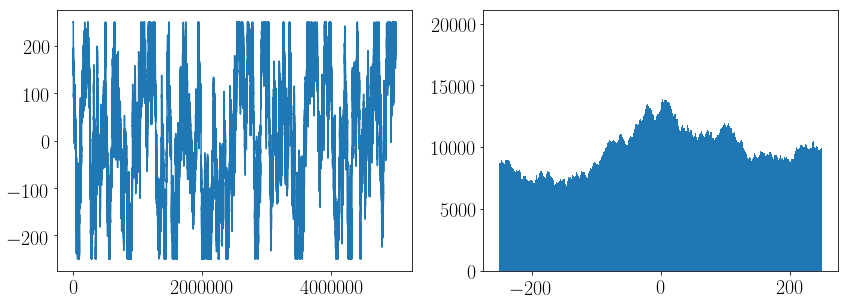

In [53]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[100*conv:], bins=np.linspace(-N/2, N/2, N+1));

In [38]:
N = 100
tauA = 0
tauB = 0
duration = 10000 * N
conv = N
d = 150
tauA = 150

print('d, τ, N, µ, r')
for i in range(1, 11):
    x = x[:101]
    N = i * 50
    (fA, fB) = modelFunctions(N, d = d)
    x = [N/2] * 150 + [N/2 + 1]
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    m = np.mean(x[100*conv:])
    print(d, ', ', tauA, ', ', N, ', ', m, ', ', N/2-m)


d, τ, N, µ, r
150 ,  150 ,  50 ,  0.32096518611807695 ,  24.679034813881923
150 ,  150 ,  100 ,  0.4955213901718021 ,  49.5044786098282
150 ,  150 ,  150 ,  2.089242953852493 ,  72.91075704614751
150 ,  150 ,  200 ,  -9.976767179955381 ,  109.97676717995537
150 ,  150 ,  250 ,  5.672232821054567 ,  119.32776717894544
150 ,  150 ,  300 ,  3.3837636885687132 ,  146.6162363114313
150 ,  150 ,  350 ,  -9.037949767257722 ,  184.03794976725771
150 ,  150 ,  400 ,  -12.809872433598512 ,  212.8098724335985
150 ,  150 ,  450 ,  -15.003195472205755 ,  240.00319547220576
150 ,  150 ,  500 ,  -21.686672032851554 ,  271.68667203285156


In [39]:
N = 100
tauA = 0
tauB = 0
duration = 10000 * N
conv = N
d = 150
tauA = 150

print('d, τ, N, µ, r')
for i in range(1, 11):
    x = x[:151]
    N = 500 + i * 50
    (fA, fB) = modelFunctions(N, d = d)
    x = [N/2] * 150 + [N/2 + 1]
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    m = np.mean(x[100*conv:])
    print(d, ', ', tauA, ', ', N, ', ', m, ', ', N/2-m)


d, τ, N, µ, r
150 ,  150 ,  550 ,  -19.098881887712075 ,  294.0988818877121
150 ,  150 ,  600 ,  -14.353109778205546 ,  314.3531097782055
150 ,  150 ,  650 ,  -25.477492826851662 ,  350.4774928268517
150 ,  150 ,  700 ,  -40.95838513519655 ,  390.9583851351965
150 ,  150 ,  750 ,  -22.94308746847703 ,  397.943087468477
150 ,  150 ,  800 ,  -31.331473684316837 ,  431.33147368431685
150 ,  150 ,  850 ,  -41.824728753493154 ,  466.82472875349316
150 ,  150 ,  900 ,  -13.545182502466796 ,  463.5451825024668
150 ,  150 ,  950 ,  -28.957440834781767 ,  503.9574408347818
150 ,  150 ,  1000 ,  -31.46899210322466 ,  531.4689921032247


In [40]:
N = 100
tauA = 0
tauB = 0
duration = 10000 * N
conv = N
d = 150
tauA = 150

print('d, τ, N, µ, r')
for i in range(0, 35):
    x = x[:151]
    N = 290 + i*2
    (fA, fB) = modelFunctions(N, d = d)
    x = [N/2] * 150 + [N/2 + 1]
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    m = np.mean(x[100*conv:])
    print(d, ', ', tauA, ', ', N, ', ', m, ', ', N/2-m)


d, τ, N, µ, r
150 ,  150 ,  290 ,  2.408094320967206 ,  142.5919056790328
150 ,  150 ,  292 ,  -5.508235612547985 ,  151.508235612548
150 ,  150 ,  294 ,  -9.04198955512846 ,  156.04198955512845
150 ,  150 ,  296 ,  -0.8476666690232096 ,  148.8476666690232
150 ,  150 ,  298 ,  -2.8197285060561468 ,  151.81972850605615
150 ,  150 ,  300 ,  -4.107298785740761 ,  154.10729878574077
150 ,  150 ,  302 ,  4.147980459546069 ,  146.85201954045394
150 ,  150 ,  304 ,  -8.770670332100861 ,  160.77067033210085
150 ,  150 ,  306 ,  24.729607908288735 ,  128.27039209171127
150 ,  150 ,  308 ,  -23.83317090019603 ,  177.83317090019602
150 ,  150 ,  310 ,  -37.943223811317665 ,  192.94322381131767
150 ,  150 ,  312 ,  -22.657185621183032 ,  178.65718562118303
150 ,  150 ,  314 ,  -17.299765389319408 ,  174.29976538931942
150 ,  150 ,  316 ,  -23.86483071773901 ,  181.864830717739
150 ,  150 ,  318 ,  -25.35836958201325 ,  184.35836958201324
150 ,  150 ,  320 ,  -32.050223652755996 ,  192.050223652756